<a href="https://colab.research.google.com/github/Nikhil5566/Data-Science-Portfolio-Projects/blob/main/Stock%20Price%20Dataset%20%26%20Forecasting%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Stocks Prices Dataset & Forcasting

# Introduction and Key Insights

---

Our journey began with a rich dataset containing FAANG stock market data (Facebook/Meta, Apple, Amazon, Netflix/Nvidia, Google/Alphabet, Microsoft) along with various technical indicators, spanning from 2016 to early 2026. This dataset, comprising nearly 15,000 entries and 19 columns, offered a comprehensive look into the stock performance of these tech giants.

Data Characteristics and Initial Observations:
Comprehensive Coverage: The data includes daily Open, High, Low, Close prices, Volume, and several calculated technical indicators such as SMA_7, SMA_21, EMA_12, EMA_26, RSI_14, MACD, MACD_Signal, Bollinger_Upper, Bollinger_Lower, Daily_Return, Volatility_7d, and Next_Day_Close.
Cleanliness: A quick check revealed no missing values or duplicate entries, which is fantastic news as it means we didn't need extensive data cleaning.
Date Range: The data covers approximately a decade, providing ample historical context for trend analysis.
Key Insights from Analysis:
Risk vs. Reward (Statistical Analysis): When we looked at the risk (volatility, measured by standard deviation of daily returns) against the average daily returns, we observed the classic trade-off. Some stocks, like NVDA, showed higher average daily returns but also came with significantly higher risk. Others, like MSFT, offered relatively lower risk but also more modest returns. AAPL and GOOGL appeared to be in a similar risk-return bracket.

Stock Correlations: The correlation matrix highlighted how closely these tech stocks move together. High positive correlations (e.g., AAPL and MSFT at 0.98, or META and NVDA at 0.95) suggest that they often rise and fall in tandem, likely influenced by broader market trends or the tech sector's overall performance. This is crucial for portfolio diversification, as highly correlated assets might not offer the intended risk reduction.

Distribution of Key Metrics (Univariate Analysis): Histograms of numerical features like Close prices showed varying distributions. Most stock prices tended to be right-skewed, indicating periods of lower prices being more frequent than peak prices. Volume, as expected, showed significant variability, reflecting different trading activities over time.

Trends Over Time (Multivariate Analysis): The line plot of 'Closing Price Trends for FAANG Stocks Over Time' visually confirmed divergent growth paths. While all stocks generally showed an upward trend over the decade, the steepness and volatility varied greatly. NVDA, for example, demonstrated explosive growth in later years, while others had more stable, albeit strong, appreciation.

Machine Learning Prediction (Random Forest):

We also ventured into machine learning, building a Random Forest Regressor to predict the Next_Day_Close price for a single stock (initially AAPL). We used features like lagged prices (Lag_1, Lag_7), moving averages (MA_7, MA_30), volatility (Rolling_Std_7), and daily trading metrics (Open, High, Low, Volume).

Model Performance: For AAPL, the model achieved a Mean Absolute Error (MAE) of 32.27 dollars. This means, on average, our model's prediction for the next day's closing price was off by about 32.27 dollars. This means, on average, our model's prediction for the next day's closing price was off by about $32.27. While this might seem high in absolute terms for a single stock, it's a good starting point for a complex task like stock price prediction.

Feature Importance: Insights from feature importance revealed that MA_30 (30-day Moving Average) was by far the most influential feature in predicting the next day's close, followed by Low and High prices. This underscores the significance of longer-term trends and the daily trading range in forecasting future stock movements.

In essence, this dataset provides a rich playground for understanding stock market dynamics, from individual stock behavior to inter-stock relationships and predictive modeling. The insights gleaned are invaluable for investors, traders, and data scientists alike.



---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d vishardmehta/faang-stock-market-data-with-technical-indicators

# Unziping the downloaded file
!unzip faang-stock-market-data-with-technical-indicators.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vishardmehta/faang-stock-market-data-with-technical-indicators
License(s): CC0-1.0
  0% 0.00/2.08M [00:00<?, ?B/s]
100% 2.08M/2.08M [00:00<00:00, 690MB/s]
Archive:  faang-stock-market-data-with-technical-indicators.zip
  inflating: faang_stock_prices.csv  


# Data Inspection

In [3]:
df = pd.read_csv('faang_stock_prices.csv')
df.head(11)

Date Ticker        Open        High         Low       Close  \
0   2016-02-23   AAPL   21.853144   21.875812   21.433763   21.465500   
1   2016-02-23   AMZN   27.777500   27.845501   27.266500   27.646999   
2   2016-02-23  GOOGL   36.032746   36.270944   35.515157   35.595547   
3   2016-02-23   META  106.108789  106.724491  104.390794  104.728432   
4   2016-02-23   MSFT   46.158514   46.184970   44.959133   45.135513   
5   2016-02-23   NVDA    0.762756    0.778123    0.759097    0.770805   
6   2016-02-24   AAPL   21.304558   21.848618   21.154940   21.785145   
7   2016-02-24   AMZN   27.287500   27.713499   26.657499   27.702000   
8   2016-02-24  GOOGL   35.264055   35.790579   34.837779   35.774696   
9   2016-02-24   META  103.487111  106.208102  102.027307  106.138588   
10  2016-02-24   MSFT   44.703366   45.417704   44.271238   45.294239   

       Volume       SMA_7      SMA_21      EMA_12      EMA_26     RSI_14  \
0   127770400   21.782546   21.682435   21.720115   21.827292  52.112369   
1    81016000   26.675857   27.140333   26.765295   27.363824  50.230010   
2    41332000   35.747473   36.132564   35.810892   36.019909  28.846871   
3    25319300  103.488525  103.976073  103.607174  102.390311  34.031434   
4    28895300   45.542440   45.303900   45.301104   45.262960  42.877882   
5   369380000    0.710800    0.683503    0.704268    0.691066  67.878773   
6   145022800   21.850879   21.652174   21.730120   21.824170  50.813846   
7   124634000   27.011286   27.039167   26.909403   27.388874  57.060308   
8    37092000   35.846794   36.102505   35.805323   36.001745  38.371697   
9    34412400  104.179413  104.442813  103.996622  102.667961  39.680286   
10   33014500   45.696142   45.301346   45.300048   45.265277  47.739386   

        MACD  MACD_Signal  Bollinger_Upper  Bollinger_Lower  Daily_Return  \
0  -0.107176    -0.149939        22.401531        20.889519     -0.022605   
1  -0.598529    -0.896261        31.103668        22.908382     -0.011725   
2  -0.209017    -0.219158        38.439218        33.798573     -0.016131   
3   1.216863     1.318966       115.829165        92.886882     -0.015864   
4   0.038144    -0.096534        48.143898        42.459504     -0.027920   
5   0.013203    -0.001797         0.780719         0.585314      0.002538   
6  -0.094050    -0.138761        22.239524        20.975578      0.014891   
7  -0.479471    -0.812903        30.743809        23.032192      0.001989   
8  -0.196422    -0.214611        38.407721        33.766104      0.005033   
9   1.328661     1.320905       115.733527        93.929903      0.013465   
10  0.034771    -0.070273        48.118983        42.445783      0.003517   

    Volatility_7d  Next_Day_Close  
0        0.018130       21.785145  
1        0.022486       27.702000  
2        0.015153       35.774696  
3        0.019720      106.138588  
4        0.019161       45.294239  
5        0.028025        0.776172  
6        0.018822       21.934757  
7        0.022784       27.757500  
8        0.015166       36.182617  
9        0.019853      107.320328  
10       0.018550       45.946854

In [4]:
df.tail(11)

Date Ticker        Open        High         Low       Close  \
14953  2026-01-21   AMZN  231.089996  232.300003  226.880005  231.309998   
14954  2026-01-21  GOOGL  320.920013  332.480011  319.350006  328.380005   
14955  2026-01-21   META  606.739990  618.270020  600.080017  612.960022   
14956  2026-01-21   MSFT  452.600006  452.690002  438.679993  444.109985   
14957  2026-01-21   NVDA  179.050003  185.380005  178.399994  183.320007   
14958  2026-01-22   AAPL  249.199997  251.000000  248.149994  248.350006   
14959  2026-01-22   AMZN  234.050003  235.720001  230.899994  234.339996   
14960  2026-01-22  GOOGL  334.450012  335.149994  328.750000  330.540009   
14961  2026-01-22   META  629.349976  660.570007  626.549988  647.630005   
14962  2026-01-22   MSFT  447.619995  452.839996  444.700012  451.140015   
14963  2026-01-22   NVDA  184.750000  186.169998  183.929993  184.839996   

          Volume       SMA_7      SMA_21      EMA_12      EMA_26     RSI_14  \
14953   47276100  237.904284  235.680476  236.613744  235.095267  48.743303   
14954   35386600  330.975712  320.864287  326.221736  319.982561  64.957780   
14955   14494700  620.958575  645.958095  629.464700  639.941268  27.090368   
14956   37980500  460.339996  475.198095  464.584599  473.286599  20.436249   
14957  200381000  184.080002  186.050953  184.418933  184.583013  43.582744   
14958   39708300  253.921424  263.157615  256.309211  262.339803  11.871533   
14959   31913300  236.171426  236.013333  236.263937  235.039321  53.529872   
14960   26253600  330.787144  321.977620  326.886086  320.764595  67.582193   
14961   21394700  621.767151  645.427618  632.259363  640.510804  45.687381   
14962   25349400  456.619999  473.541905  462.516201  471.646111  28.776809   
14963  139636600  184.065715  186.234286  184.483712  184.602049  47.511984   

            MACD  MACD_Signal  Bollinger_Upper  Bollinger_Lower  Daily_Return  \
14953   1.518477     2.446891       248.713914       223.480084      0.001342   
14954   6.239175     6.448799       339.035395       304.063607      0.019814   
14955 -10.476568    -5.419078       686.036524       604.598473      0.014633   
14956  -8.702000    -5.738079       500.906501       448.417498     -0.022903   
14957  -0.164079     0.416518       192.021648       180.586354      0.029483   
14958  -6.030592    -4.355544       280.781111       244.752881      0.002827   
14959   1.224615     2.202436       248.520707       224.264292      0.013099   
14960   6.121491     6.383337       339.589684       305.585319      0.006578   
14961  -8.251442    -5.985550       684.649099       604.598899      0.056562   
14962  -9.129910    -6.416445       500.741510       445.204489      0.015829   
14963  -0.118336     0.309547       191.990911       180.732090      0.008291   

       Volatility_7d  Next_Day_Close  
14953       0.015543      234.339996  
14954       0.015203      330.540009  
14955       0.016304      647.630005  
14956       0.010888      451.140015  
14957       0.024107      184.839996  
14958       0.013499      248.039993  
14959       0.017721      239.160004  
14960       0.014879      327.929993  
14961       0.028988      658.760010  
14962       0.014832      465.950012  
14963       0.024363      187.669998

In [ ]:
df.shape

(14964, 19)

In [ ]:
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_7',
       'SMA_21', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal',
       'Bollinger_Upper', 'Bollinger_Lower', 'Daily_Return', 'Volatility_7d',
       'Next_Day_Close'],
      dtype='object')

In [ ]:
df.dtypes

Date                object
Ticker              object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
SMA_7              float64
SMA_21             float64
EMA_12             float64
EMA_26             float64
RSI_14             float64
MACD               float64
MACD_Signal        float64
Bollinger_Upper    float64
Bollinger_Lower    float64
Daily_Return       float64
Volatility_7d      float64
Next_Day_Close     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  object 
 1   Ticker           14964 non-null  object 
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7

In [ ]:
df.describe(include = 'all').T

count unique         top  freq              mean  \
Date               14964   2494  2026-01-22     6               NaN   
Ticker             14964      6        AAPL  2494               NaN   
Open             14964.0    NaN         NaN   NaN        147.969959   
High             14964.0    NaN         NaN   NaN        149.643762   
Low              14964.0    NaN         NaN   NaN        146.256716   
Close            14964.0    NaN         NaN   NaN        147.999839   
Volume           14964.0    NaN         NaN   NaN  118624748.229083   
SMA_7            14964.0    NaN         NaN   NaN        147.631588   
SMA_21           14964.0    NaN         NaN   NaN        146.746646   
EMA_12           14964.0    NaN         NaN   NaN        147.314335   
EMA_26           14964.0    NaN         NaN   NaN        146.428158   
RSI_14           14964.0    NaN         NaN   NaN         55.686976   
MACD             14964.0    NaN         NaN   NaN          0.886176   
MACD_Signal      14964.0    NaN         NaN   NaN          0.888239   
Bollinger_Upper  14964.0    NaN         NaN   NaN        156.048174   
Bollinger_Lower  14964.0    NaN         NaN   NaN        137.572513   
Daily_Return     14964.0    NaN         NaN   NaN          0.001335   
Volatility_7d    14964.0    NaN         NaN   NaN          0.018537   
Next_Day_Close   14964.0    NaN         NaN   NaN        148.126287   

                              std        min         25%         50%  \
Date                          NaN        NaN         NaN         NaN   
Ticker                        NaN        NaN         NaN         NaN   
Open                   132.599874   0.762756   50.094322  123.841343   
High                    134.00175   0.777392   50.468777  125.102966   
Low                    131.065146   0.746413   49.669161  122.262753   
Close                  132.547711   0.767738   50.083026  123.922924   
Volume           188946063.682473  4726100.0  24280500.0  44326000.0   
SMA_7                  132.261571     0.7108   49.906533  123.301276   
SMA_21                 131.557653   0.683503   49.334041  122.667958   
EMA_12                  131.95665   0.704268   49.600781  123.067546   
EMA_26                 131.170115   0.691066    49.14609  122.222704   
RSI_14                  16.597436   3.180003   43.754097   56.381405   
MACD                     4.177106 -33.155902   -0.331123    0.507975   
MACD_Signal              3.932864  -30.72727   -0.283075    0.491224   
Bollinger_Upper        139.825874   0.780719   51.982837  131.496224   
Bollinger_Lower        123.751294   0.569458   47.077112  114.337861   
Daily_Return             0.022069  -0.263901   -0.008375    0.001286   
Volatility_7d            0.012431   0.001171    0.010449    0.015466   
Next_Day_Close         132.632577   0.767738   50.149251  124.013718   

                         75%           max  
Date                     NaN           NaN  
Ticker                   NaN           NaN  
Open              189.299623    789.972167  
High              191.429458    795.064526  
Low               186.986899    779.657506  
Close             189.079613    788.823792  
Volume           105732900.0  3692928000.0  
SMA_7             188.811102    775.982954  
SMA_21            187.325549     762.48498  
EMA_12            187.740894    766.193137  
EMA_26            186.739774    757.613109  
RSI_14             67.819077         100.0  
MACD                2.160937     29.441884  
MACD_Signal          2.06812      26.79065  
Bollinger_Upper   199.721259    813.954233  
Bollinger_Lower   176.264492    734.580075  
Daily_Return        0.011626      0.298067  
Volatility_7d       0.022748      0.120255  
Next_Day_Close    189.254452    788.823792

In [ ]:
df.isnull().sum()

Date               0
Ticker             0
Open               0
High               0
Low                0
Close              0
Volume             0
SMA_7              0
SMA_21             0
EMA_12             0
EMA_26             0
RSI_14             0
MACD               0
MACD_Signal        0
Bollinger_Upper    0
Bollinger_Lower    0
Daily_Return       0
Volatility_7d      0
Next_Day_Close     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

# Statistical Analysis

--- 1. CALCULATING RETURNS (WHAT INVESTORS CARE ABOUT) ---
✅ Created 'Daily_Return' column.

--- 2. RISK VS. REWARD (VOLATILITY) ---
        Average Return  Risk (Volatility)
Ticker                                   
AAPL          0.001148           0.018201
AMZN          0.001066           0.020427
GOOGL         0.001058           0.018120
META          0.001024           0.024053
MSFT          0.001064           0.016771
NVDA          0.002688           0.031379


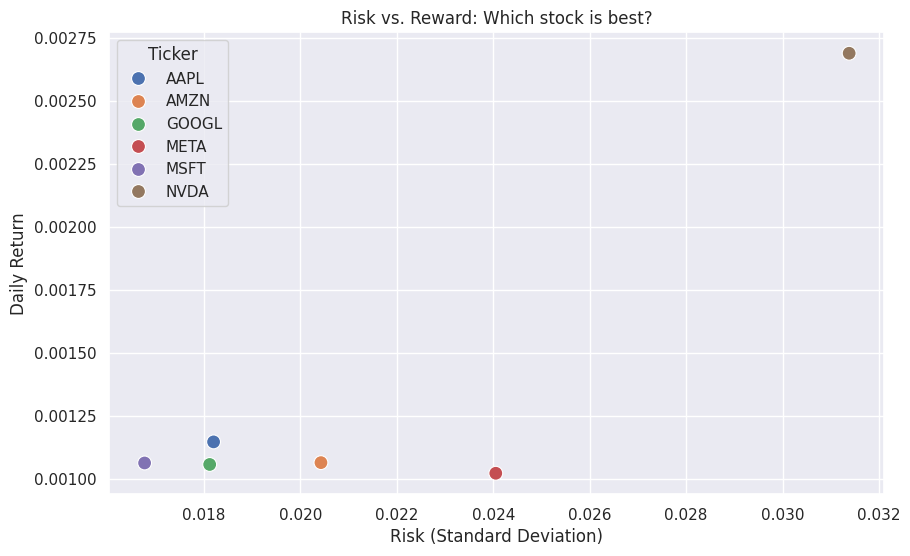


--- 3. CORRELATION MATRIX (DO THEY MOVE TOGETHER?) ---


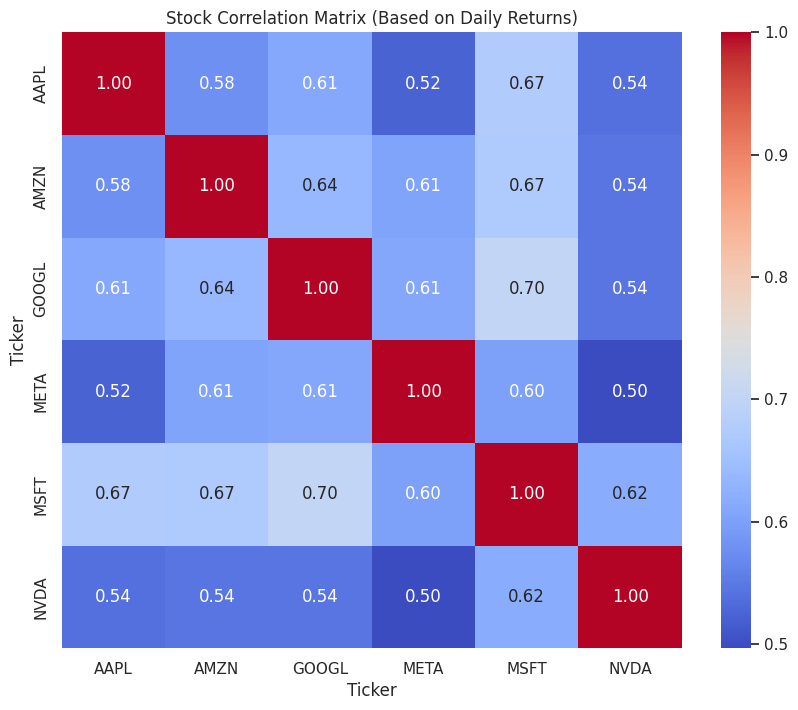

In [6]:
print("--- 1. CALCULATING RETURNS (WHAT INVESTORS CARE ABOUT) ---")
# We assume the column is 'Close' or 'Adj Close'
# Daily Return = (Today - Yesterday) / Yesterday

# Create 'Daily_Return' for each Company (assuming a 'Ticker' or 'Company' column exists)
if 'Ticker' in df.columns:
    df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change()
else:
    print("⚠️ No 'Ticker' column found. Treating as single stock.")
    df['Daily_Return'] = df['Close'].pct_change()

print("✅ Created 'Daily_Return' column.")

print("\n--- 2. RISK VS. REWARD (VOLATILITY) ---")
# Volatility = Standard Deviation of Returns
# High Volatility = High Risk

if 'Ticker' in df.columns:
    risk_profile = df.groupby('Ticker')['Daily_Return'].agg(['mean', 'std'])
    risk_profile.columns = ['Average Return', 'Risk (Volatility)']

    print(risk_profile)

    # Visualizing Risk
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=risk_profile, x='Risk (Volatility)', y='Average Return', s=100, hue=risk_profile.index)
    plt.title('Risk vs. Reward: Which stock is best?')
    plt.xlabel('Risk (Standard Deviation)')
    plt.ylabel('Daily Return')
    plt.grid(True)
    plt.show()
else:
    print(f"Stock Volatility: {df['Daily_Return'].std():.4f}")

print("\n--- 3. CORRELATION MATRIX (DO THEY MOVE TOGETHER?) ---")
# We need to pivot the table so each stock is a column
if 'Ticker' in df.columns:
    # IMPROVEMENT: Use Daily_Return instead of Close Price.
    # Price correlation is often spurious (both go up over time).
    # Return correlation shows if they actually move in sync day-to-day.
    pivot_df = df.pivot_table(index='Date', columns='Ticker', values='Daily_Return')
    corr = pivot_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Stock Correlation Matrix (Based on Daily Returns)')
    plt.show()

# Univariate Analysis

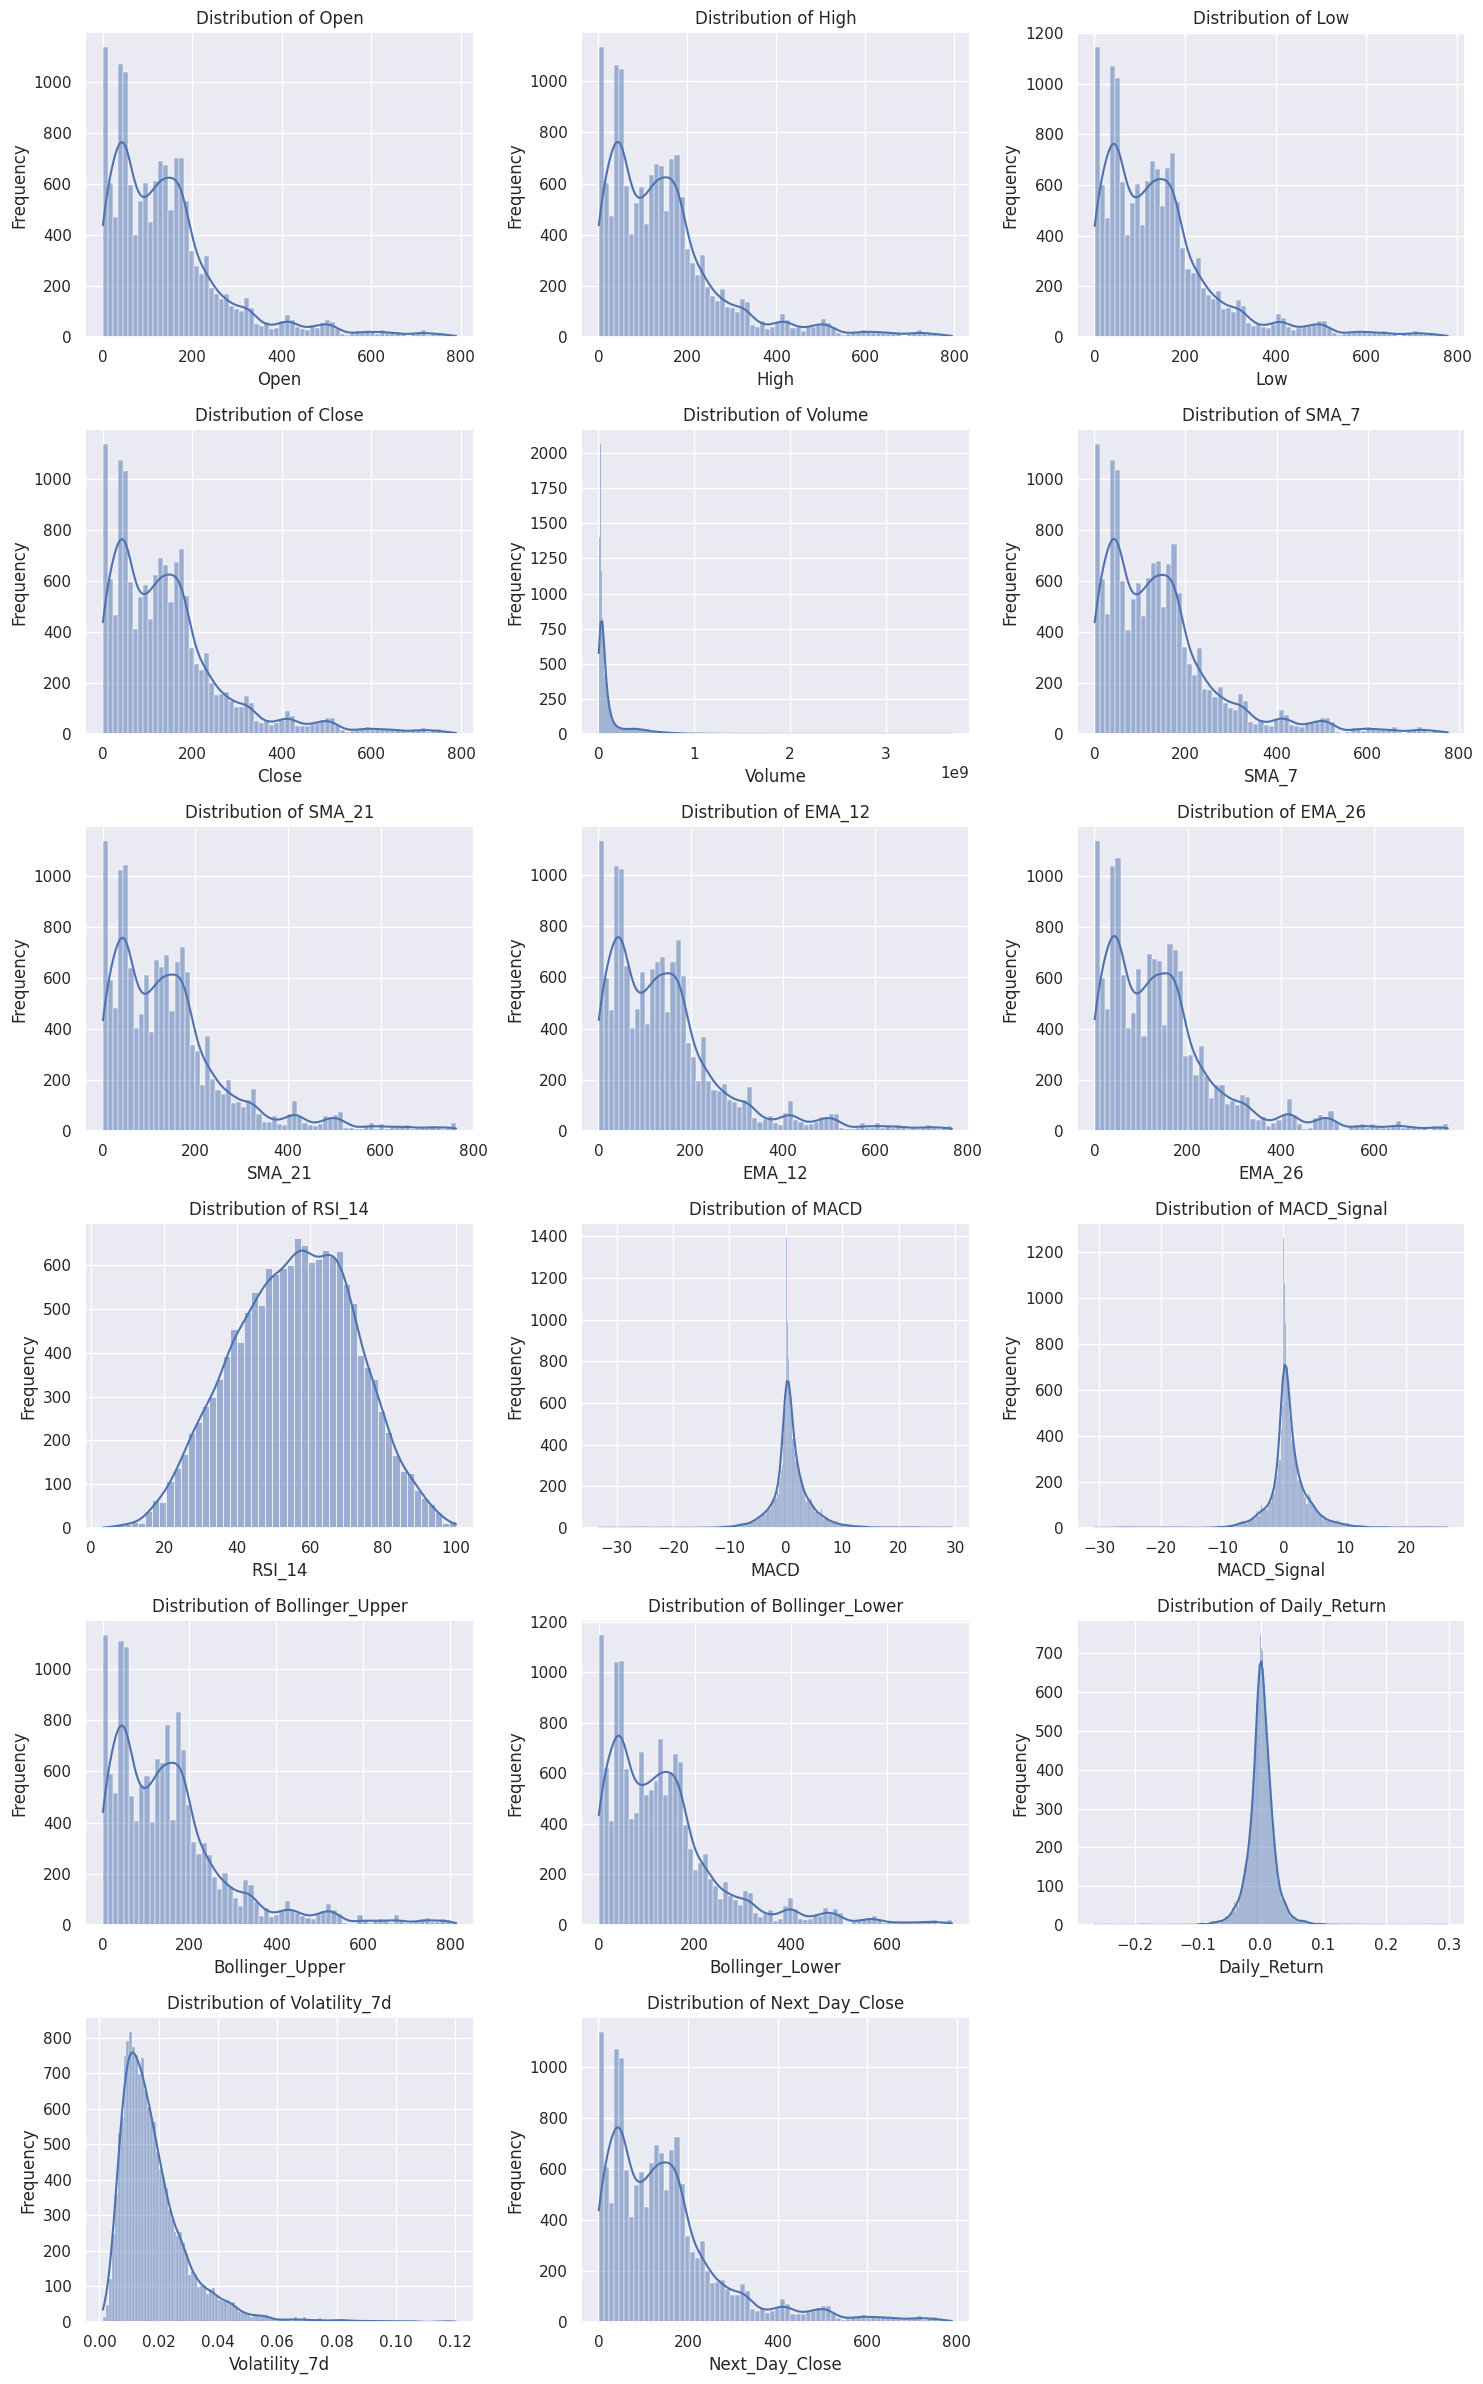

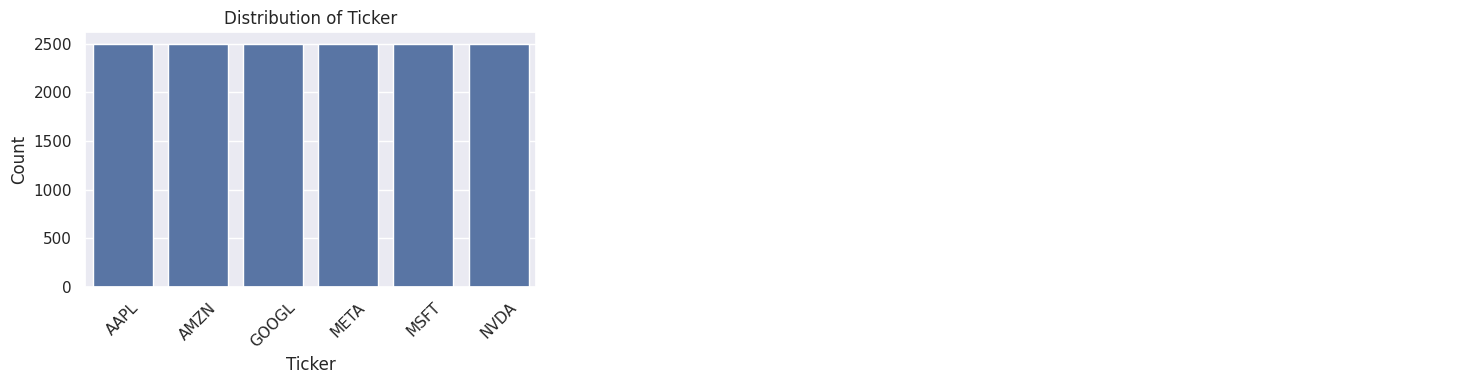

--- Categorical Value Counts ---

Value counts for Ticker:
Ticker
AAPL     2494
AMZN     2494
GOOGL    2494
META     2494
MSFT     2494
NVDA     2494
Name: count, dtype: int64


In [5]:
import math

# IMPROVEMENT: Convert Date to datetime immediately so it's not treated as a categorical object
# This prevents the code from trying to plot 2500+ individual dates in the categorical section
if 'Date' in df.columns and df['Date'].dtype == 'object':
    df['Date'] = pd.to_datetime(df['Date'])

# --- 1. Numerical Columns (Histograms in a Grid) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    # Define grid size
    num_plots = len(numerical_cols)
    num_cols = 3  # You can change this to 2 or 4 if preferred
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Iterate and plot
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hidding any unused subplots (if total plots < grid cells)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


# --- 2. Categorical Columns (Countplots in a Grid) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if len(categorical_cols) > 0:
    # Define grid size
    num_plots = len(categorical_cols)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()

    # Iterate and plot
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # --- 3. Value Counts (Text Output) ---
    print("--- Categorical Value Counts ---")
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
else:
    print("No categorical columns found.")

# Bivariate Analysis

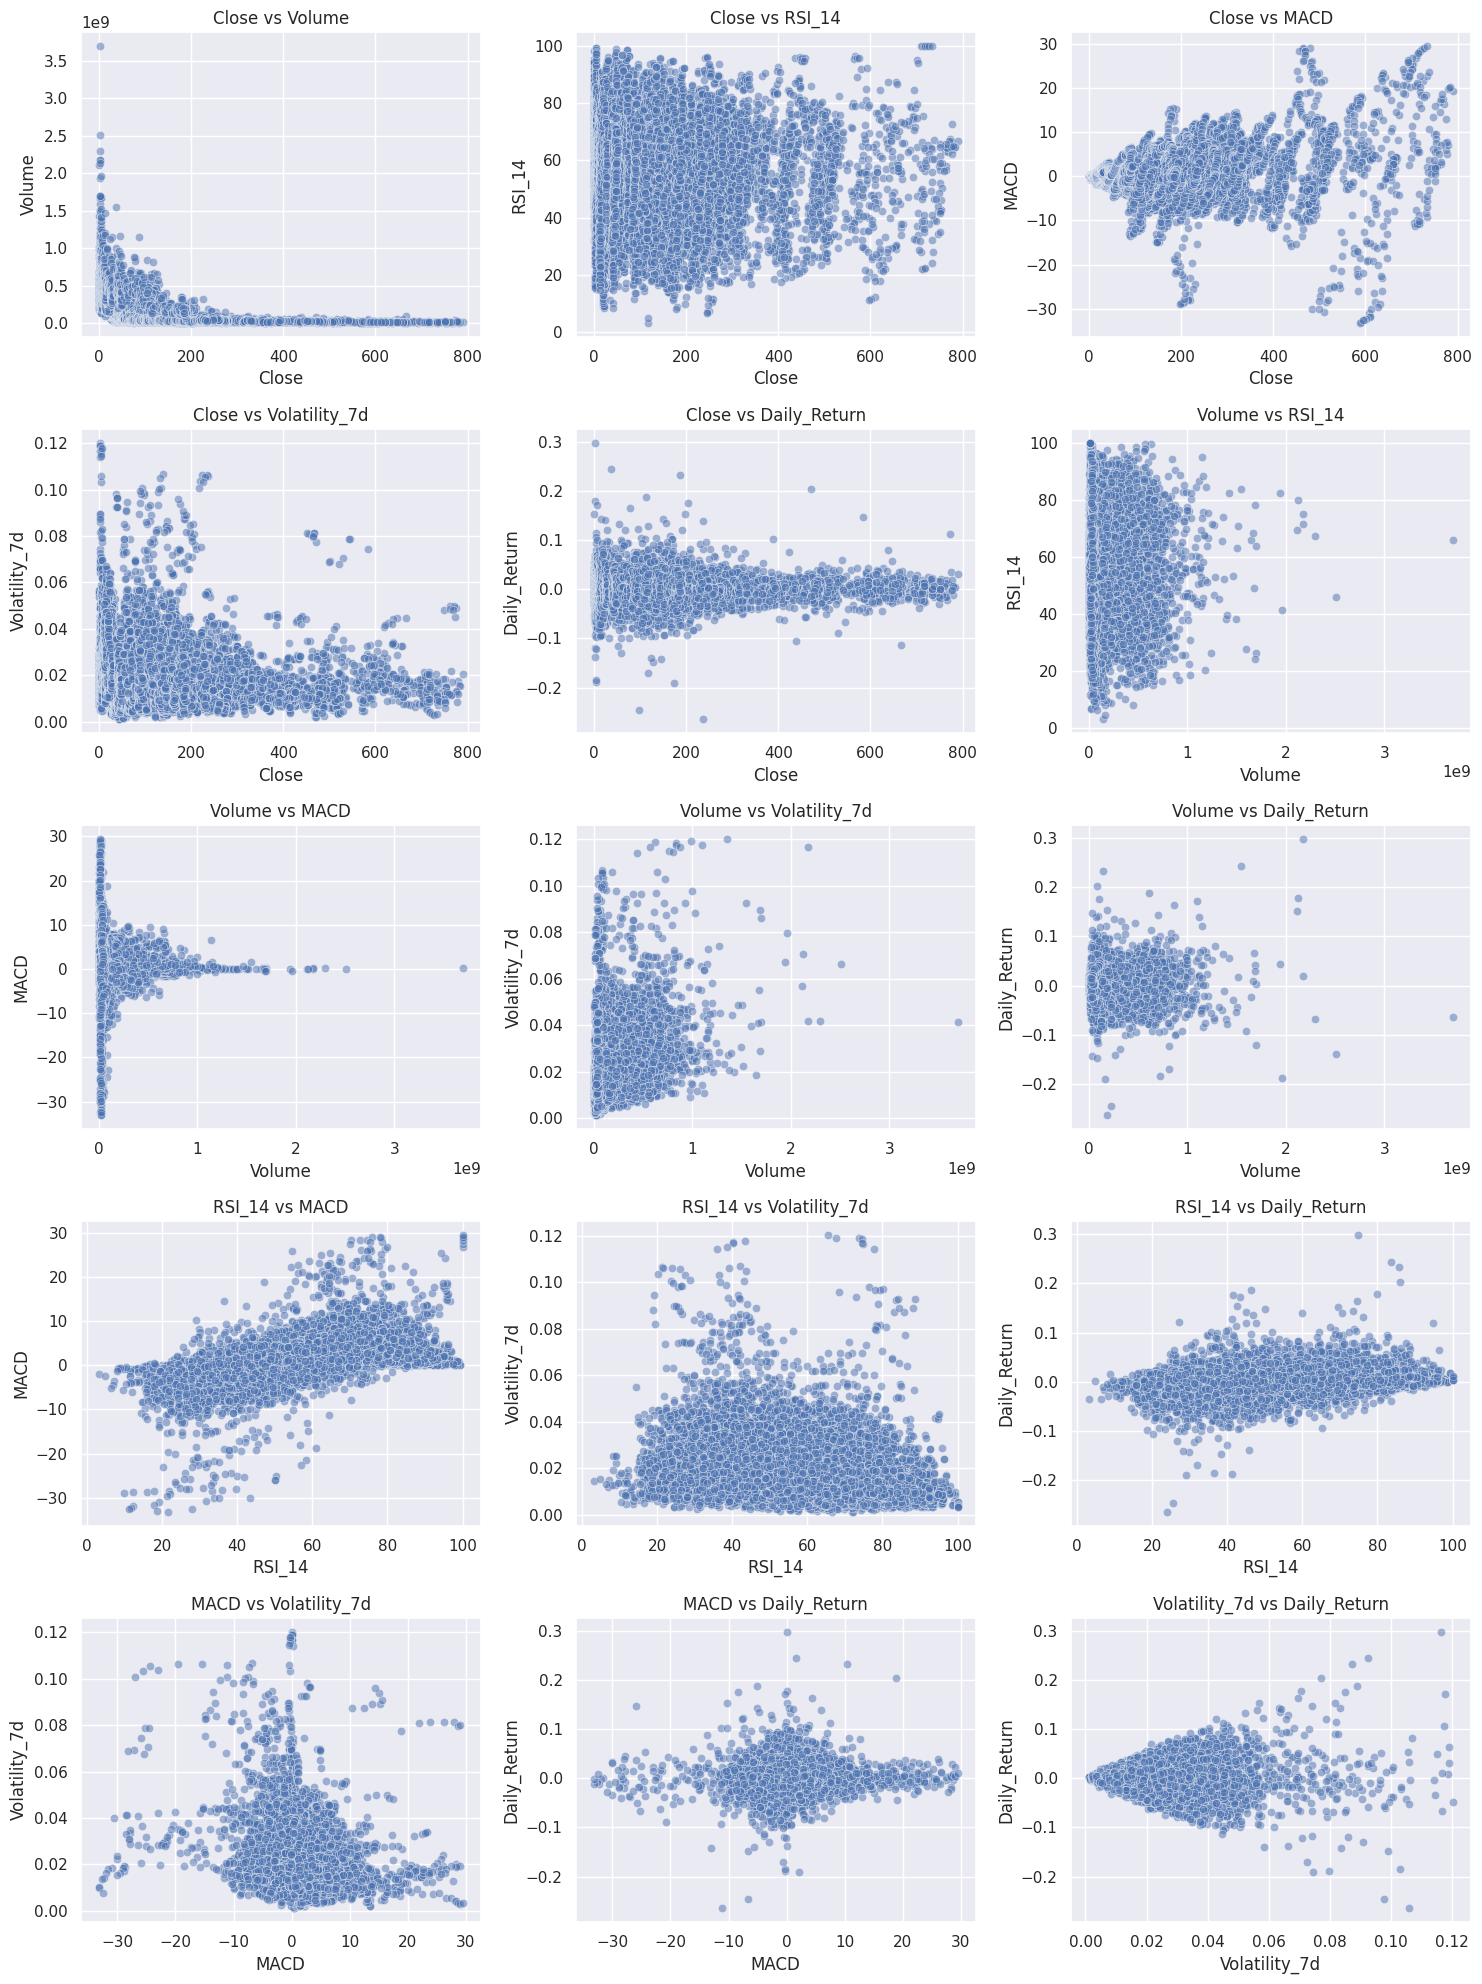

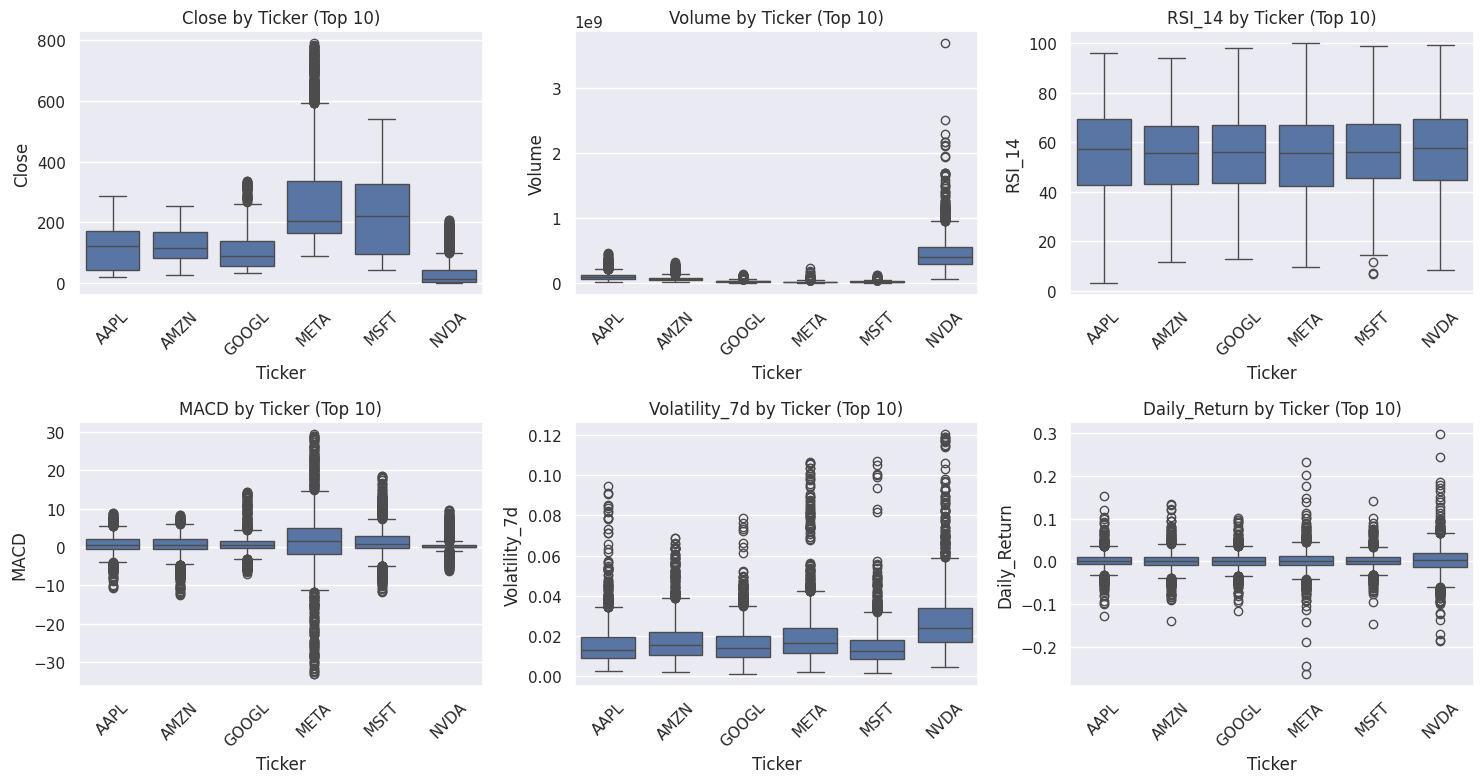

In [7]:
import itertools

# --- 1. Numerical-Numerical Relationships (Scatter Plots) ---
# IMPROVEMENT: Select only key columns. Doing combinations on all 19 columns
# would generate ~150 plots, which creates clutter and performance issues.
key_numerical_cols = ['Close', 'Volume', 'RSI_14', 'MACD', 'Volatility_7d', 'Daily_Return']
# Ensure these columns actually exist
numerical_cols = [c for c in key_numerical_cols if c in df.columns]

# Generate all unique pairs of numerical columns
num_pairs = list(itertools.combinations(numerical_cols, 2))

if len(num_pairs) > 0:
    # Define grid size
    num_plots = len(num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes]) # If it's a single Axes object (e.g., 1x1 plot), make it an array
    else:
        axes = axes.flatten() # Flatten if it's already an array (1D or 2D)

    # Iterate through pairs and plot
    for i, (col1, col2) in enumerate(num_pairs):
        # Only plot if there's an available Axes object in the flattened array
        if i < len(axes):
            sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i], alpha=0.5)
            axes[i].set_title(f'{col1} vs {col2}')
            axes[i].set_xlabel(col1)
            axes[i].set_ylabel(col2)
        else:
            break # Stop if we run out of axes (shouldn't happen with correct num_rows/cols)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for scatter plots.")


# --- 2. Categorical-Numerical Relationships (Box Plots) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Use the limited set of numerical columns here too for clarity

# Generate all pairs of (Categorical, Numerical)
cat_num_pairs = list(itertools.product(categorical_cols, numerical_cols))

if len(cat_num_pairs) > 0:
    # Define grid size
    num_plots = len(cat_num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    else:
        axes = axes.flatten()

    # Iterate through pairs and plot
    for i, (cat_col, num_col) in enumerate(cat_num_pairs):
        if i < len(axes):
            # 1. Get top 10 categories based on frequency
            top_categories = df[cat_col].value_counts().nlargest(10).index.tolist()

            # 2. Filter data: Keep only top categories AND ensure numerical column is not NaN
            filtered_df = df[df[cat_col].isin(top_categories) & df[num_col].notnull()]

            # 3. Update 'order' to only include categories that exist in the filtered data
            # This prevents the ValueError where a category in 'order' has no data to plot
            valid_categories = [cat for cat in top_categories if cat in filtered_df[cat_col].unique()]

            if valid_categories:
                sns.boxplot(data=filtered_df, x=cat_col, y=num_col, ax=axes[i], order=valid_categories)
                axes[i].set_title(f'{num_col} by {cat_col} (Top 10)')
                axes[i].set_xlabel(cat_col)
                axes[i].set_ylabel(num_col)
                axes[i].tick_params(axis='x', rotation=45)
            else:
                 axes[i].text(0.5, 0.5, "No valid data", ha='center', va='center', transform=axes[i].transAxes)
        else:
            break

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical-numerical pairs found.")

# Multivariate Analysis

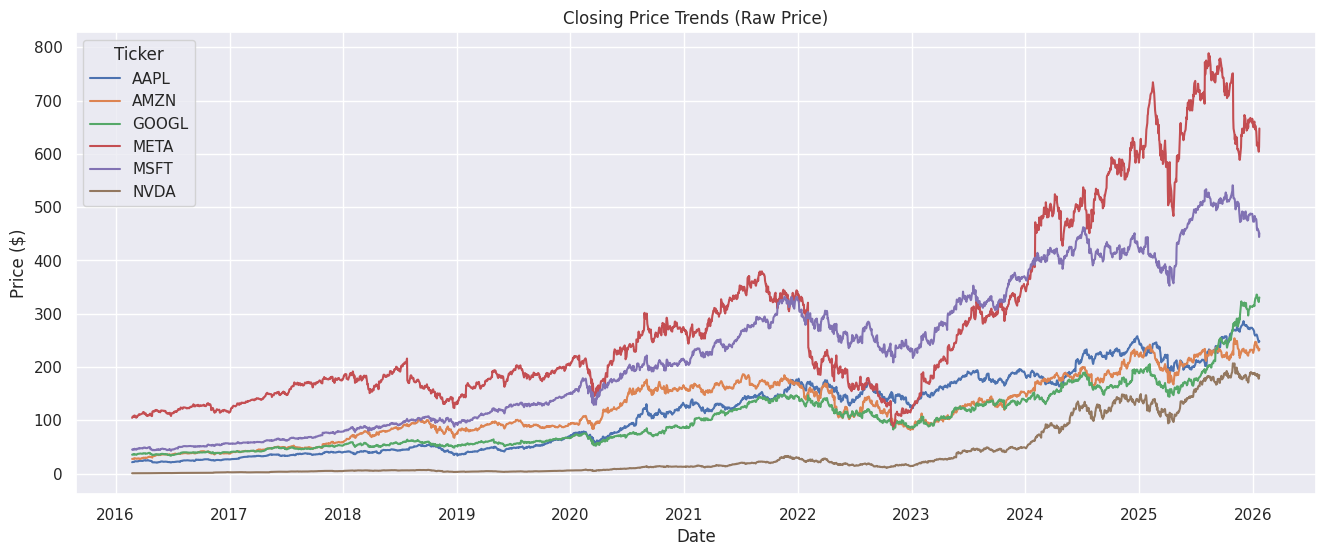

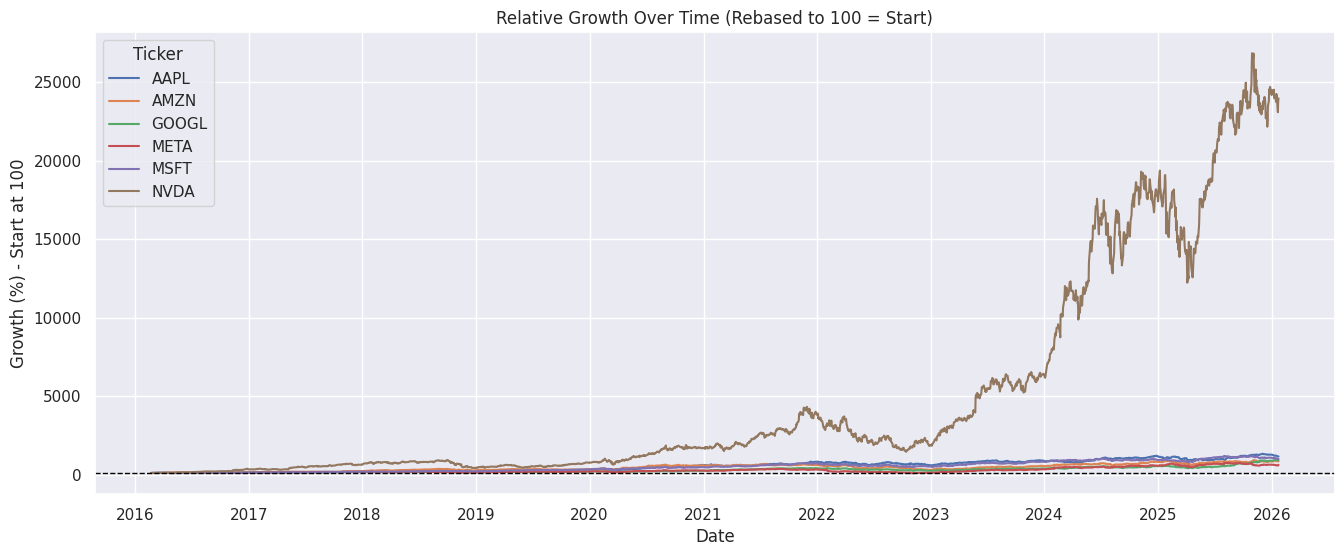

In [9]:
if df['Date'].dtype == 'object':
    df['Date'] = pd.to_datetime(df['Date'])

# 1.Standard Price Trend (Raw Prices)
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='Date', y='Close', hue='Ticker')
plt.title('Closing Price Trends (Raw Price)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend(title='Ticker')
plt.show()

# 2. Normalized Growth Plot (Rebased to 100)
# This allows comparing PERFORMANCE across stocks with vastly different prices.
# We divide every price by the first price in the series and multiply by 100.
df['Normalized_Close'] = df.groupby('Ticker')['Close'].transform(lambda x: x / x.iloc[0] * 100)

plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='Date', y='Normalized_Close', hue='Ticker')
plt.title('Relative Growth Over Time (Rebased to 100 = Start)')
plt.xlabel('Date')
plt.ylabel('Growth (%) - Start at 100')
plt.axhline(100, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend(title='Ticker')
plt.show()

Generating Pairplot for key features (this might take a moment)...


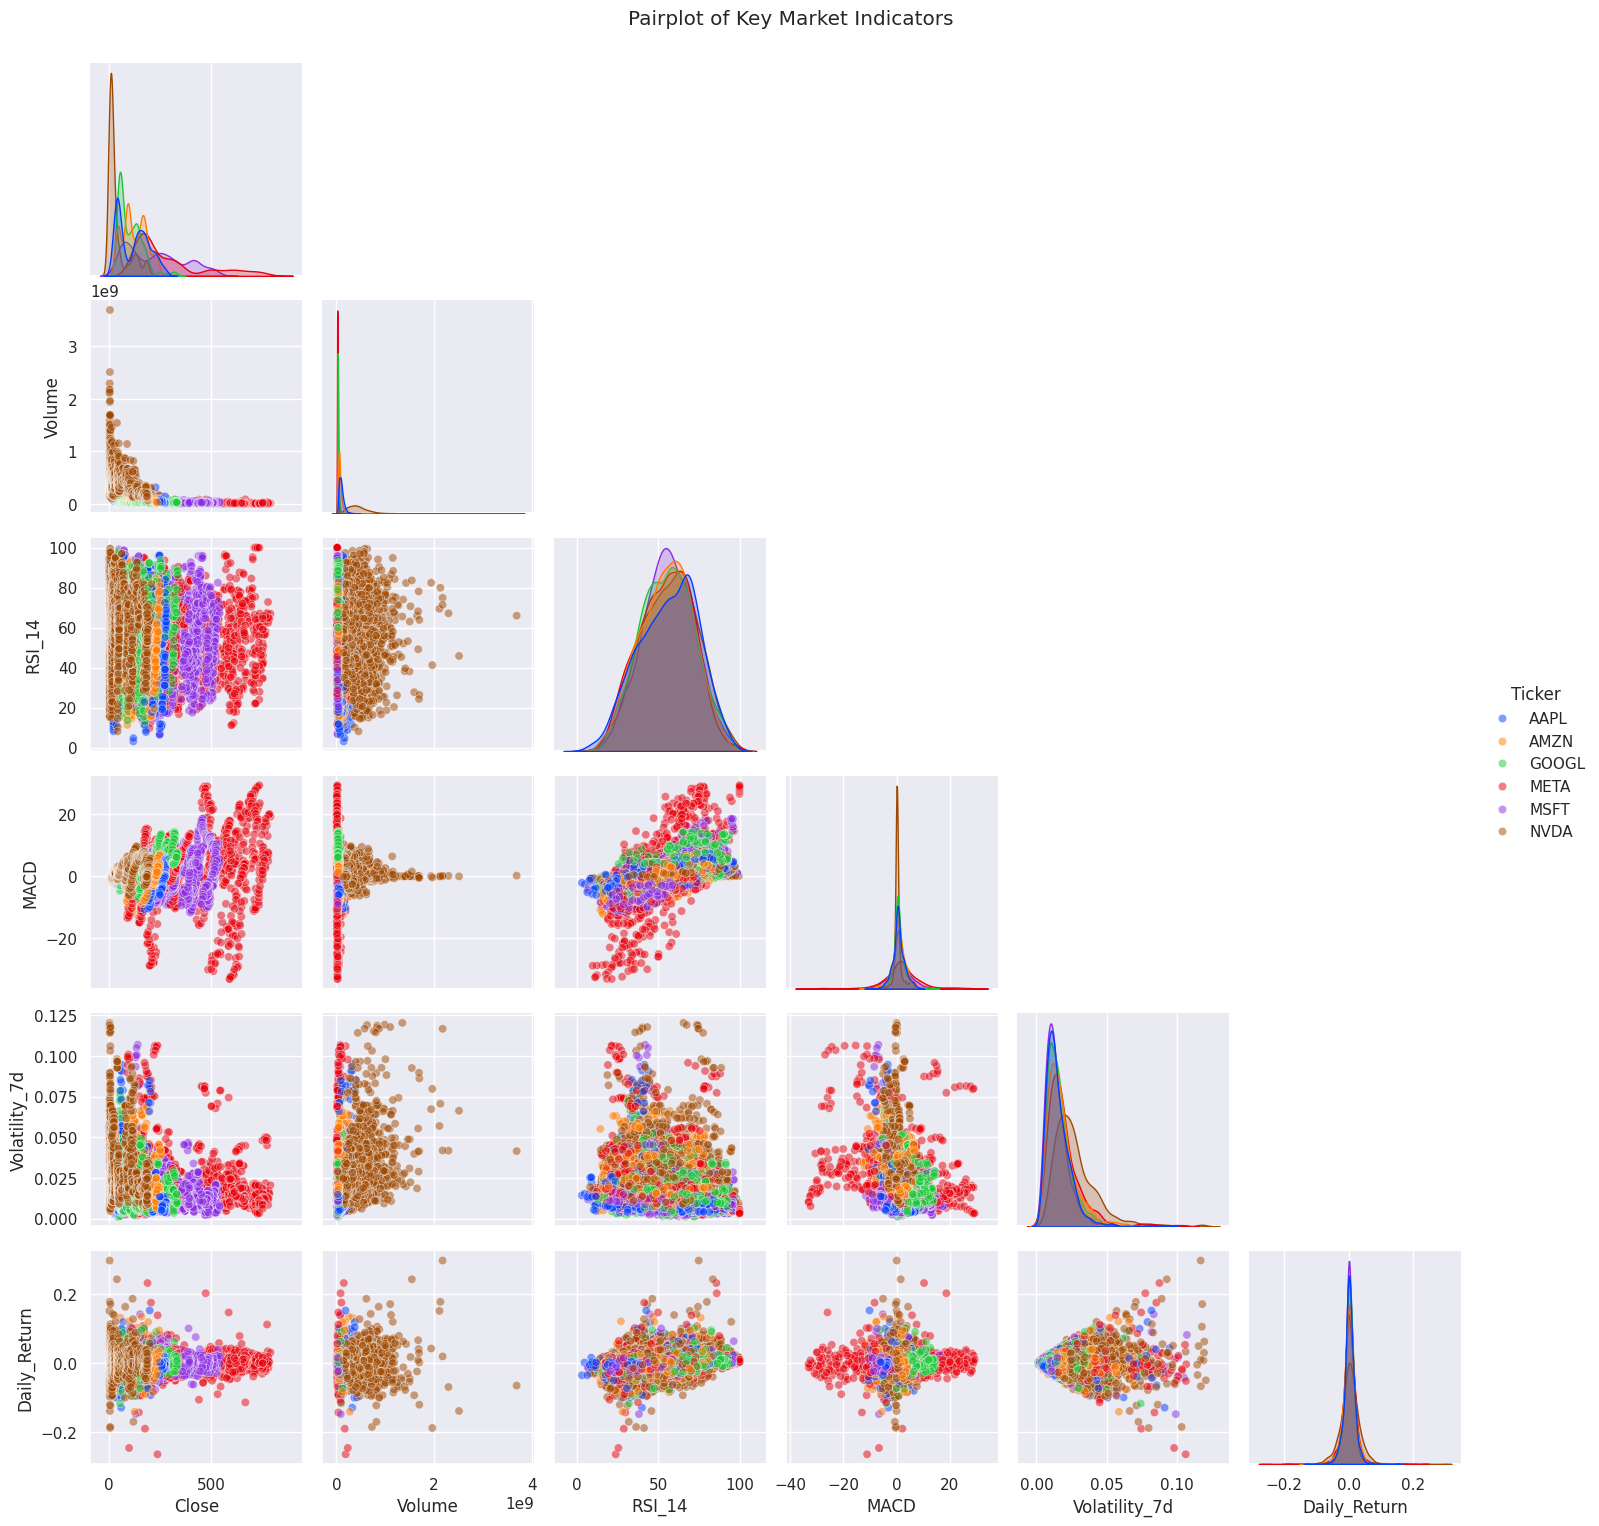

In [10]:
# Selecting specific columns. Plotting ALL numerical columns (15+) creates a massive, unreadable grid and takes forever to render.
key_features = ['Close', 'Volume', 'RSI_14', 'MACD', 'Volatility_7d', 'Daily_Return']
existing_features = [c for c in key_features if c in df.columns]

# Add Ticker for coloring to see clusters
plot_data = df[existing_features + ['Ticker']].dropna()

print("Generating Pairplot for key features (this might take a moment)...")

# 'corner=True' removes the redundant upper triangle of the plot
sns.pairplot(plot_data, hue='Ticker', corner=True, plot_kws={'alpha': 0.5}, palette='bright')
plt.suptitle('Pairplot of Key Market Indicators', y=1.02)
plt.show()

# Time-Series Analysis

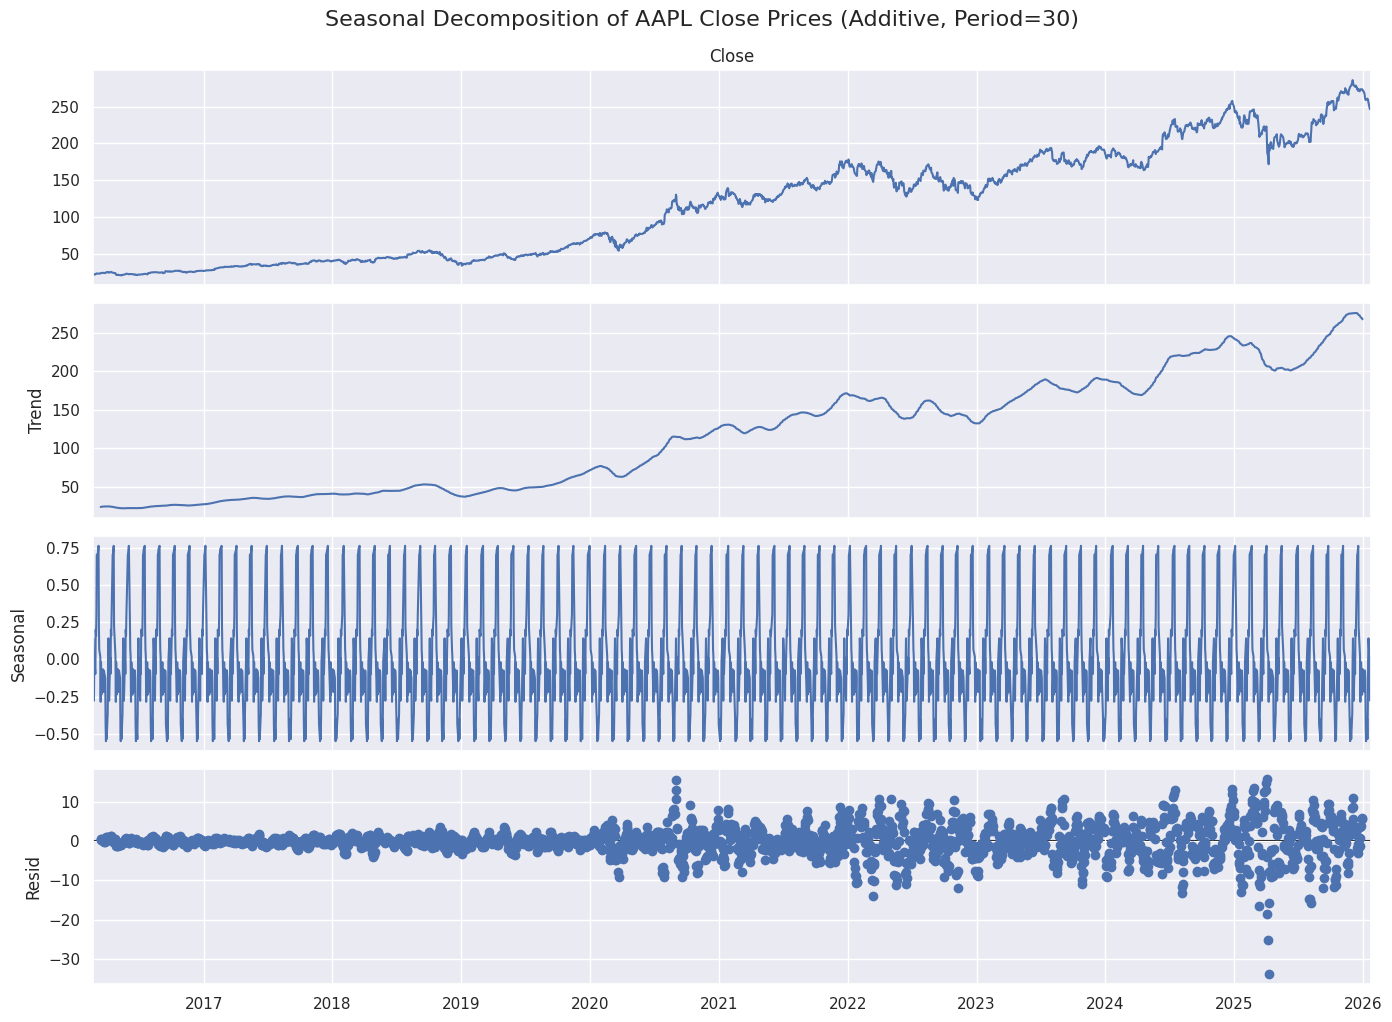

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Filterring the DataFrame for AAPL
df_aapl = df[df['Ticker'] == 'AAPL'].copy()

# 2. Setting 'Date' as index and ensure it's sorted
# Ensuring Date is datetime
if not pd.api.types.is_datetime64_any_dtype(df_aapl['Date']):
    df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

df_aapl.set_index('Date', inplace=True)
df_aapl.sort_index(inplace=True)

# 3. Applying seasonal_decompose
# Using period=30 to observe monthly seasonality patterns
decomposition = seasonal_decompose(df_aapl['Close'], model='additive', period=30)

# 4. Generating the decomposition plots
plt.rcParams.update({'figure.figsize': (14, 10)})
fig = decomposition.plot()
fig.suptitle('Seasonal Decomposition of AAPL Close Prices (Additive, Period=30)', y=1.02, fontsize=16)
plt.show()

## Technical Analysis Visualization


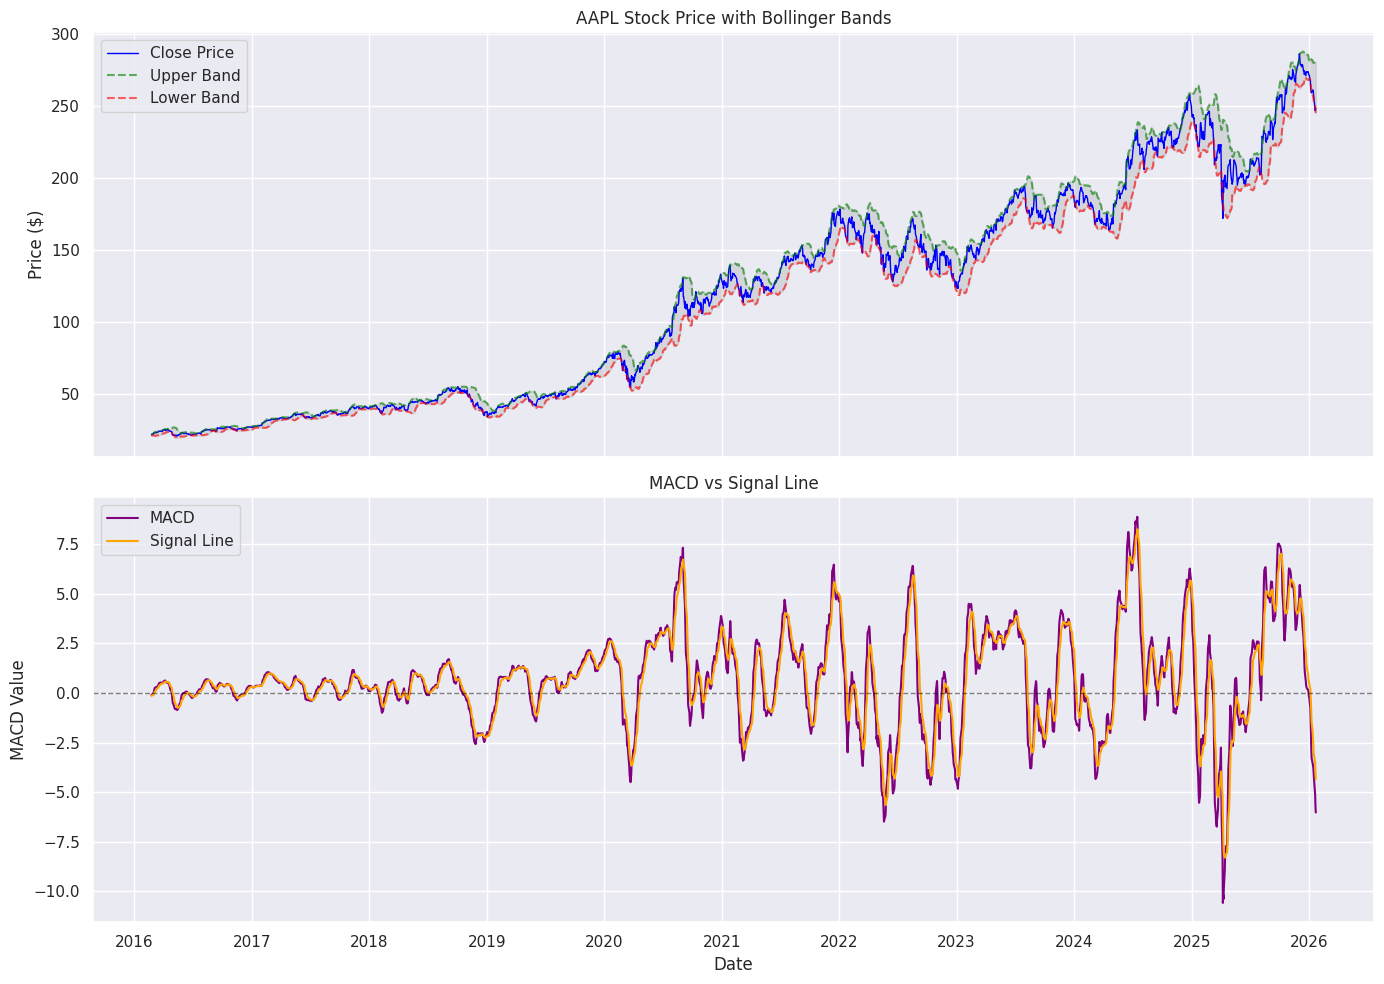

In [12]:
# Creating a figure with 2 subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# --- Subplot 1: Price & Bollinger Bands ---
ax1.plot(df_aapl.index, df_aapl['Close'], label='Close Price', color='blue', linewidth=1)
ax1.plot(df_aapl.index, df_aapl['Bollinger_Upper'], label='Upper Band', color='green', linestyle='--', alpha=0.6)
ax1.plot(df_aapl.index, df_aapl['Bollinger_Lower'], label='Lower Band', color='red', linestyle='--', alpha=0.6)

# Shading the area between Bollinger Bands
ax1.fill_between(df_aapl.index, df_aapl['Bollinger_Upper'], df_aapl['Bollinger_Lower'], color='gray', alpha=0.2)

ax1.set_title('AAPL Stock Price with Bollinger Bands')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True)

# --- Subplot 2: MACD ---
ax2.plot(df_aapl.index, df_aapl['MACD'], label='MACD', color='purple')
ax2.plot(df_aapl.index, df_aapl['MACD_Signal'], label='Signal Line', color='orange')

# Adding horizontal zero line
ax2.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)

ax2.set_title('MACD vs Signal Line')
ax2.set_ylabel('MACD Value')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Autocorrelation Analysis


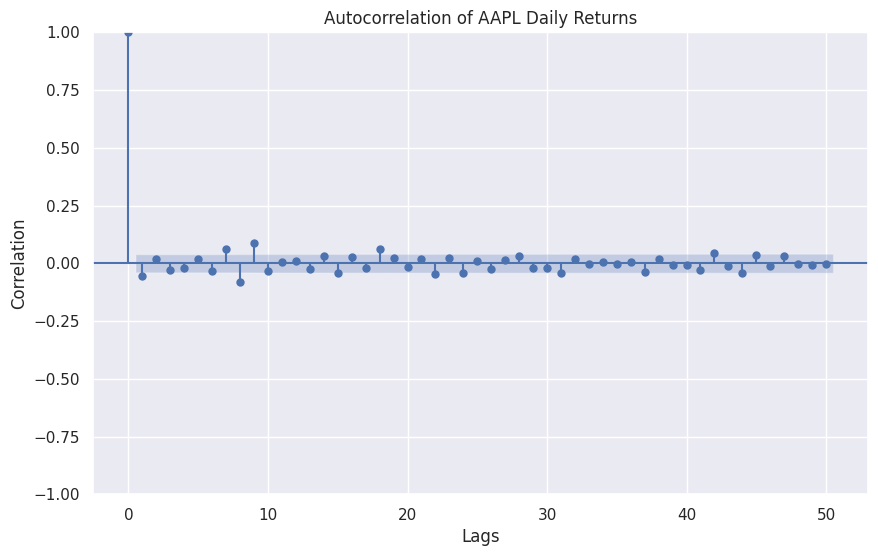

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Preparing the data: Drop NaN values from Daily_Return
returns = df_aapl['Daily_Return'].dropna()

# Generating the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(returns, lags=50, ax=plt.gca())

# Setting title and labels
plt.title('Autocorrelation of AAPL Daily Returns')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid(True)

# Displaying the plot
plt.show()

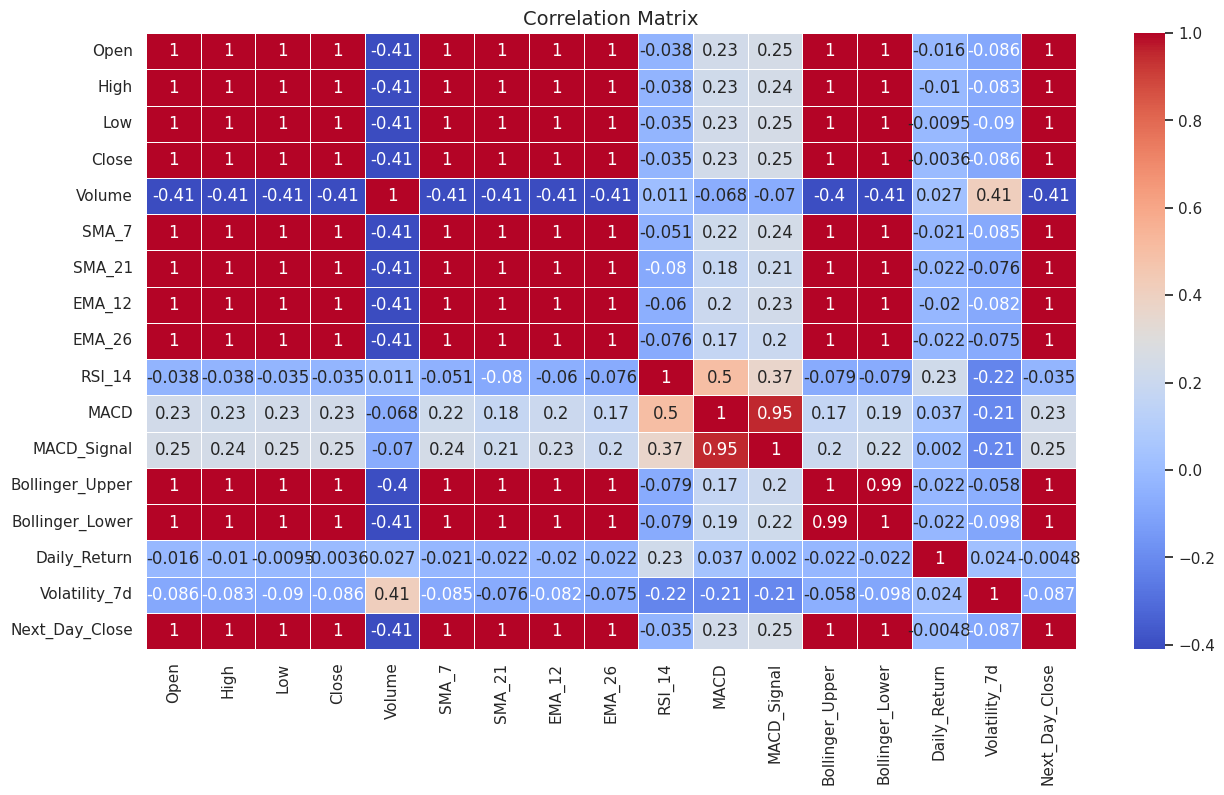

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# Machine Learning

--- 1. DATA PREPARATION (FOCUSING ON ONE STOCK) ---
Training AI Model for: AAPL

--- 2. FEATURE ENGINEERING (TECHNICAL INDICATORS) ---
✅ Features Created: [Lag_1, Lag_7, MA_7, MA_30, Rolling_Std_7]

--- 3. TRAINING THE RANDOM FOREST ---
Using Features: ['Lag_1', 'Lag_7', 'MA_7', 'MA_30', 'Rolling_Std_7', 'Open', 'High', 'Low', 'Volume', 'RSI_14', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower', 'EMA_12', 'EMA_26']

--- 4. MODEL EVALUATION ---
💰 Mean Absolute Error: $33.19
   (On average, the AI is off by $33.19)


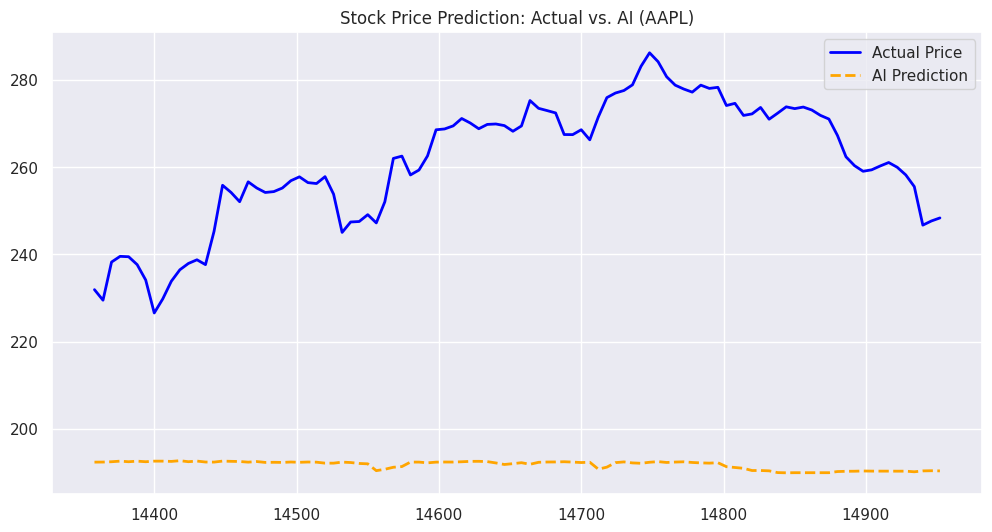

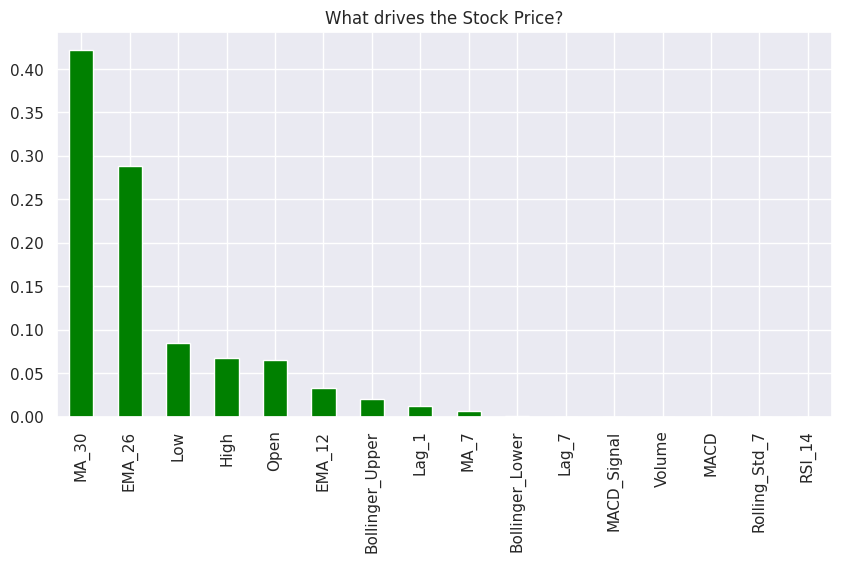

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

print("--- 1. DATA PREPARATION (FOCUSING ON ONE STOCK) ---")
# ML works best when focused. Let's pick the most popular stock (e.g., AAPL or the first one found)
if 'Ticker' in df.columns:
    stock_list = df['Ticker'].unique()
    target_stock = stock_list[0] # Picks the first one (e.g., AAPL)
    print(f"Training AI Model for: {target_stock}")

    # Create a copy to avoid SettingWithCopy warnings
    df_ml = df[df['Ticker'] == target_stock].copy()
else:
    print("Treating dataset as a single stock.")
    df_ml = df.copy()

# Ensure sorted by date
if 'Date' in df_ml.columns:
    df_ml['Date'] = pd.to_datetime(df_ml['Date'])
    df_ml = df_ml.sort_values('Date')

print("\n--- 2. FEATURE ENGINEERING (TECHNICAL INDICATORS) ---")
# 1. Lag Features (What was the price yesterday?)
df_ml['Lag_1'] = df_ml['Close'].shift(1)
df_ml['Lag_7'] = df_ml['Close'].shift(7)

# 2. Moving Averages (Is the trend going up?)
df_ml['MA_7'] = df_ml['Close'].rolling(window=7).mean()
df_ml['MA_30'] = df_ml['Close'].rolling(window=30).mean()

# 3. Volatility (Risk)
df_ml['Rolling_Std_7'] = df_ml['Close'].rolling(window=7).std()

# 4. TARGET VARIABLE (What we want to predict)
# We want to predict "Next Day's Close"
df_ml['Next_Close'] = df_ml['Close'].shift(-1)

# Drop NaNs created by shifting/rolling
df_ml.dropna(inplace=True)

print("✅ Features Created: [Lag_1, Lag_7, MA_7, MA_30, Rolling_Std_7]")

print("\n--- 3. TRAINING THE RANDOM FOREST ---")
# IMPROVEMENT: Use the rich technical indicators already present in the dataset
# The dataset has RSI, MACD, Bollinger Bands, etc. Use them!
features = [
    'Lag_1', 'Lag_7', 'MA_7', 'MA_30', 'Rolling_Std_7',
    'Open', 'High', 'Low', 'Volume',
    'RSI_14', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower', 'EMA_12', 'EMA_26'
]

# Verify features exist in dataframe
features = [f for f in features if f in df_ml.columns]
print(f"Using Features: {features}")

# Note: In a real trading bot, you wouldn't know Open/High/Low for tomorrow yet,
# but for "Next Day" prediction using "Today's" data, this is valid.

X = df_ml[features]
y = df_ml['Next_Close']

# Time-Series Split (Train on Past, Test on Future)
# We don't use random_split because we can't look into the future!
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

print("\n--- 4. MODEL EVALUATION ---")
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"💰 Mean Absolute Error: ${mae:.2f}")
print(f"   (On average, the AI is off by ${mae:.2f})")

# Visualizing the Forecast
plt.figure(figsize=(12, 6))
# Plotting last 100 days for clarity
plt.plot(y_test.index[-100:], y_test.values[-100:], label='Actual Price', color='blue', linewidth=2)
plt.plot(y_test.index[-100:], preds[-100:], label='AI Prediction', color='orange', linestyle='--', linewidth=2)
plt.title(f'Stock Price Prediction: Actual vs. AI ({target_stock if "Ticker" in df.columns else "Stock"})')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
importances.plot(kind='bar', color='green')
plt.title("What drives the Stock Price?")
plt.show()

# Thank You